# Numeričko rješavanje sustava linearnih jednadžbi i inicijalnog problema za ODJ

## Sadržaj
1. [Numeričko rješavanje sustava linearnih jednadžbi](#Numericko1)

 1.1. [Uvod i motivacija](#uvod1)
    
 1.2. [Pozadina metodâ](#pozadina)
   
 1.3. [Metode](#metode) - <b>ispraviti matricne zapise da odgovaraju ZR</b>
            
  1.3.1. [Jacobijeva metoda](#Jacobi)
        
  1.3.2. [Gauss–Seidelova metoda](#Gauss)
        
  1.3.1. [SOR metoda](#SOR)
    
 1.4. [Testiranje i usporedba metoda na primjerima](#Testiranje1)
    
  1.4.1. [Stieltjes matrica](#Stieltjes)
        
  1.4.2. [Slučajno generirana matrica](#Slucajna)
  
  1.4.3. [Slučajno generirana dijagonalna matrica](#Dijagonalna)
        
 1.5. [Zaključak](#Zakljucak1)
    
    
2. [Numeričko rješavanje inicijalnog problema za ODJ](#Numericko2)
    
 2.1. [Uvod](#uvod2)
    
 2.2. [Jednokoračne metode](#jednokoracne)
        
   2.2.1. [Eulerova metoda](#Euler)
        
   2.2.2. [Trapezna metoda](#trapez)
   
 2.3. [Višekoračne metode](#visekoracne)
        
   2.3.1. [Adams–Bashforthova metoda](#Adams)
    
 2.4. [Testiranje i usporedba na primjerima](#Testiranje2)
    
 2.5. [Zaključak](#Zakljucak2)
    

3. [Literatura](#Literatura)

In [47]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from PIL import Image

## 1. Numeričko rješavanje sustava linearnih jednadžbi <a name="Numericko1"></a>

### 1.1. Uvod i motivacija <a name="uvod1"></a>

Jedan od osnovnih problema numeričke matematike je rješavanje linearnih sustava jednadžbi. U ovom eseju istraživat ćemo metode za rješavanje kvadratnih $n\times n$ sustava, odnosno sustava od $n$ jednadžbi s $n$ nepoznanica,

$$
\begin{equation}
a_{11}x_{1} + a_{12}x_{2} + ... + a_{1j}x_{j} + ... + a_{1n}x_{n} = b_{1}\\
a_{21}x_{1} + a_{22}x_{2} + ... + a_{2j}x_{j} + ... + a_{2n}x_{n} = b_{2}\\
\vdots\\
a_{i1}x_{1} + a_{i2}x_{2} + ... + a_{ij}x_{j} + ... + a_{in}x_{n} = b_{i}\\
\vdots\\
a_{n1}x_{1} + a_{n2}x_{2} + ... + a_{nj}x_{j} + ... + a_{nn}x_{n} = b_{n}\\
\end{equation}
$$

Matricu $A=(a_{ij})_{i,j=1}^{n}$ nazivamo <b>matrica sustava</b>, a njeni elementi su <b>koeficijenti sustava</b>. Vektor $b=(b_{i})_{i=1}^{n}$ naziva se <b>vektor desne strane</b>. Trebamom odrediti <b>vektor nepoznanica</b> $x$, $x=(x_{i})_{i=1}^{n}$ tako da vrijedi $Ax=b$.

Iz linearne algebre znamo da je rješavanje sustava $Ax=b$ za teorijsku matematiku gotovo trivijalan problem, posebno u slučaju kada je matrica sustava kvadratna i regularna. Rješenje $x$ dano je formulom $x=A^{-1}b$, gdje je $A^{-1}$ inverzna matrica od $A$ ($AA^{-1}=A^{-1}A=I$). Pri tome postoje eksplicitne formule i za elemente matrice $A^{-1}$ i za samo rješenje $x$. Osim toga, Gaussova metoda eliminacija dolazi do rješenja $x$ u $O(n^{3})$ elementarnih operacija (gdje su elementarne operacije: zbrajanje, oduzimanje, množenje i dijeljenje).

Dakle, znamo da rješenje $x=A^{-1}b$ postoji, jedinstveno je i postoji jednostavan algoritam koji to rješenje eksplicitno računa koristeći konačno mnogo jednostavnih aritmetičkih operacija.
Na žalost, konačna aritmetika računala niti te jednostavne operacije ne može izvršavati egzaktno pa Gaussovim eliminacijama (koje su jednostavno konačan niz formula koje vode rješenju) rješenje linearnog sustava $Ax=b$ općenito ne možemo izračunati apsolutno točno.

Iz tog razloga, uvodimo iterativne metode. Iterativne metode ne daju egzaktno rješenje, nego aproksimaciju tog rješenja. Pokazat će se da pomoću iterativnih metoda ne znamo egzaktno rješenje, ali znamo koliko smo "blizu" egzaktnom rješenju.

Metode koje ćemo navesti i objasniti su Jacobijeva, Gauss–Seidelova i SOR (successive over–relaxation) metoda.

### 1.2. Pozadina metodâ <a name="pozadina"></a>

Pretpostavimo da rješavamo sustav $Ax=b$ za koji vrijedi $\det A\neq0$. Budući da umjesto egzaktnog rješenja $x$, moramo koristiti neku aproksimaciju $\tilde{x}$, moramo imati način procjene kvalitete aproksimacije. Jedan način je izračunati normu $\delta x$, gdje je $\delta x = \tilde{x} - x$, no budući da je $x$ nepoznanica, to nije moguće. Drugi način je da izračunamo rezidual

$$ r = b - A\tilde{x} \label{eq:1}\tag{1} $$

Reći ćemo da je $\tilde{x}$ dobra aproksimacija od $x$ ako je, u nekoj normi $\|\cdot\|$, vrijednost $\epsilon:=\frac{||r||}{||b||}$ dovoljno mala.

Takav kriterij možemo opravdati činjenicom da je iz $\eqref{eq:1}$
$$ A\tilde{x} = \tilde{b}\equiv b-r, \frac{||\tilde{b}-b||}{||b||}=\frac{||r||}{||b||}=\epsilon.$$

Kažemo da $\tilde{x}$ egzaktno rješava sustav koji je blizak zadanom, s kontroliranom razlikom u desnoj strani sustava, vektoru $b$.

Prethodna diskusija motivira nas da potražimo i drugačije pristupe za rješavanje linearnog sustava $Ax=b$. Primijetimo da ne moramo nužno težiti pronalaženju egzaktnog rješenja. Dakle, želimo <i>dovoljno dobru</i> aproksimaciju $\tilde{x}\approx A^{-1}b$. Zbog toga ima smisla pokušati konstruirati niz $x^{(0)},x^{(1)},x^{(2)},...,x^{(k)},...$ vektora sa sljedećim svojstvima:
- Za svaki $k\in\mathbb{N}$ formula za računanje $x^{(k)}$ je jednostavna i matrica $A$ se koristi samo kao funkcijski potprogram koji računa $v\mapsto f(A)v$, gdje je $v$ vektor, a $f(A)$ označava $A,A^{*},A^{T}$ ili neki dio od $A$ (npr. $diag(A)$, gornji ili donji trokut od $A$ i sl.)
- $x^{(k)}$ teži prema $x=A^{-1}b$ i za neki $k$ (obično $k\ll n$), $x^{(k)}$ je prihvatljiva aproksimacija za $x$.

Ova svojstva su namjerno dana u nepreciznom obliku. Detalji koji ovise o konkretnom problemu i ko konkretnom načinu konstrukcije niza $(x^{(k)}$  bit će dani kada budemo opisivali metodu (metode).

Napišimo matricu $A$ kao $A=M-N$, gdje je $M$ regularna matrica i $M^{-1}A\approx I$. Imamo:

$$Mx=Nx+b,\;\text{ or }\; x=M^{-1}Nx+M^{-1}b \label{eq:2}\tag{2}$$

Označimo $F:=M^{-1}N$ i $c:=M^{-1}b$. To je problem fiksne točke $x=Fx+c$, sa $F=M^{-1}N=M^{-1}(M-A)=I-M^{-1}A$ pa je prirodno pokušati jednostavne iteracije:

$$ x^{(k+1)}=Fx^{(k)}+c. \label{eq:3}\tag{3} $$

Ubacivanjem $F=I-M^{-1}A$ i $c=M^{-1}b$ vidimo da se iteracije iz $\eqref{eq:3}$ mogu zapisati i kao

$$ x^{(k+1)}=x^{(k)}+M^{-1}r_{k},\;\text{gdje je}\;\; r_{k}=Ax^{(k)} \label{eq:4}\tag{4}$$

Intuitivno, ako smo $M$ odabrali tako da znamo koristiti $M^{-1}$ i tako da je $M^{-1}\approx A^{-1}$, onda je 

$$ x^{(k+1)}=x^{(k)} + M^{-1}r_{k}\approx x^{(k)} + A^{-1}r_{k}= x^{(k)} + x - x^{(k)}=x.$$

Kažemo da je $M$ prekondicioner za $A$ u smislu da $M^{-1}$ aproksimira $A^{-1}$. Ako imamo dobar izbor matrice $M$, onda polazni sustav $Ax=b$ možemo zamijeniti ekvivalentnim $(M^{-1}A)x=M^{-1}b$ čija matrica koeficijenata $M^{-1}A$ ima bolja svojstva od $A$.

Najveći dio problema je u tome kako odabrati rastav matrice $A$ kao $A=M-N$ koji će za neke klase problema osigurati konvergenciju. Za Jacobijevu, Gauss–Seidelovu i SOR metodu ti su rastavi izvedeni iz sljedeće reprezentacije matrice $A$:

$$ A = D(I-L-U) \label{eq:5}\tag{5}$$

$D=diag(A)$, $L$ je strogo donje trokutasta, a $U$ je strogo gornje trokutasta. Također, koristit ćemo i sljedeći rastav:
$$ A = D - \hat{L} - \hat{U},\; \hat{L}=DL,\; \hat{U}=DU$$

### 1.3. Metode <a name="metode"></a>

####  1.3.1. Jacobijeva metoda <a name="Jacobi"></a>

Jacobijeva metoda definirana je za matricu $A\in\mathbb{M}_{n}$ za koju je $a_{ii}\neq0, \forall i=1,...,n$. Za matricu $M$ ćemo uzeti dijagonalu od $A$, $M=\diag{A}$, pa je $N$ izvandijagonalni dio od $-A$. Matricu $F=D^{-1}(D-A)$ označimo sa $J$, gdje je u terminima $\eqref{eq:5}$:

$$ J=L+U \label{eq:6}\tag{6}$$



Jacobijeve iteracije $x^{(k+1)}=Jx^{(k)}+D^{-1}b$ po elementima glase:

$$ x_i^{(k+1)}=\frac{1}{a_{ii}}(b_{i}-\sum_{j=1\\j\neq i}^{n}a_{ij}x_{j}^{(k)})\label{eq:7}\tag{7}$$

Jacobi algoritam:

In [48]:
def jacobi(x, A, b, tolerance):
    # initial guess x to the solution, diagonally dominant matrix A,
    # right-hand side vector b, convergence criterion tolerance
    
    # A je kvadratna pa nije vazno uzimamo li broj redaka ili stupaca
    n = len(x)
    
    # dekompozicija matrice A
    D = np.linalg.inv(np.diag(np.diag(A)))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    #x = Fx+c
    F = (-D) @ (L+U)
    c = D @ b
    
    # vektor reziduala svake iteracije
    residual = np.array([np.linalg.norm(b - A@x)])
    
    # matrica koja u retku i ima aproksimaciju dobivenu u i-toj iteraciji 
    approximations = np.array(x)
    k = 0
    while residual[k] >= tolerance:
        k = k + 1
        x = F@x + c
        residual = np.append(residual, np.linalg.norm(b - A@x))
        approximations = np.append(approximations, x).reshape(k+1, n)
    return x, residual, approximations

#### 1.3.2. Gauss–Seidel metoda <a name="Gauss"></a>

Gledajući formulu $\eqref{eq:7}$ Jacobijeve metode, možemo primijetiti da su u trenutku računanja $x_{i}^{(k+1)}$, vrijednosti $x_{1}^{(k+1)},...,x_{i-1}^{(k+1)}$ već poznate. Budući da očekujemo da naše iteracije konvergiraju, razumno je očekivati da su $x_{1}^{(k+1)},...,x_{i-1}^{(k+1)}$ bolje vrijednosti od $x_{1}^{(k)},...,x_{i-1}^{(k)}$. Iz tog razloga uvodimo sljedeću formulu za računanje $x^{(k+1)}$:

$$ x_i^{(k+1)}=\frac{1}{a_{ii}}(b_{i}-\sum_{j=1}^{i-1}a_{ij}x_{j}^{(k+1)}-\sum_{j=i+1}^{n}a_{ij}x_{j}^{(k)}),\; i=1,...,n\label{eq:8}\tag{8}$$

U terminima $\eqref{eq:5}$, metoda glasi:

$$ x^{(k+1)}=Gx^{(k)}+(I-L)^{-1}D^{-1}b,\; G = (I-L)^{-1}U\label{eq:9}\tag{9}$$

Gauss–Seidel algoritam:

In [49]:
def gaussSeidel(x, A, b, tolerance):
    # initial guess x to the solution, diagonally dominant matrix A,
    # right-hand side vector b, convergence criterion tolerance
    
    # A je kvadratna pa nije vazno uzimamo li broj redaka ili stupaca
    n = len(A)
    
    # dekompozicija matrice A
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    D = np.linalg.inv(D + L)
    #x = Fx + c
    F = (-D) @ U
    c = D @ b
    
    # vektor reziduala svake iteracije
    residual = np.array([np.linalg.norm(b - A@x)])
    
    # matrica koja u retku i ima aproksimaciju dobivenu u i-toj iteraciji 
    approximations = np.array(x)
    k = 0
    while residual[k] >= tolerance:
        k = k + 1
        x = F@x + c
        residual = np.append(residual, np.linalg.norm(b - A@x))
        approximations = np.append(approximations, x).reshape(k+1, n)
    return x, residual, approximations

#### 1.3.3. SOR metoda <a name="SOR"></a>

SOR metoda je varijacija na Gauss–Seidelovu metodu, koja u konačnici dovodi do brže konvergencije. Analognim zaključivanjem za bilo koju sporo konvergirajuću metodu možemo kreirati bržu metodu. Ideja SOR metode je jednostavna: u Gauss–Seidelovu metodu ubacimo jedan slobodan parametar $\omega\in\mathbb{R}$ te pokušamo namjestiti $\omega$  kako bismo dobili bržu konvergenciju. Pri tome zadržavamo osnovnu ideju Gauss–Seidelove metode – koristimo najsvježije podatke:

$$ x_i^{(k+1)}=(1-\omega)x_{i}^{(k)} + \frac{\omega}{a_{ii}}(b_{i}-\sum_{j=1}^{i-1}a_{ij}x_{j}^{(k+1)}-\sum_{j=i+1}^{n}a_{ij}x_{j}^{(k)}),\; i=1,...,n\label{eq:10}\tag{10}$$

U terminima $\eqref{eq:5}$, metoda glasi:

$$ x^{(k+1)}=Sx^{(k)}+\omega(I-\omega L)^{-1}D^{-1}b,\; S = (I-\omega L)^{-1}((1-\omega)I+\omega U)\label{eq:11}\tag{11}$$

In [50]:
def sor(x, A, b, omega, tolerance):
    # initial guess x to the solution, diagonally dominant matrix A,
    # right-hand side vector b, convergence criterion tolerance
    
    # A je kvadratna pa nije vazno uzimamo li broj redaka ili stupaca
    n = len(A)
    
    # dekompozicija matrice A
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    L = np.linalg.inv(D + omega*L)
    U = (1-omega)*D - omega*U
    #x = Fx + c
    F = L @ U
    c = (omega*L) @ b
    
    # vektor reziduala svake iteracije
    residual = np.array([np.linalg.norm(b - A@x)])
    
    # matrica koja u retku i ima aproksimaciju dobivenu u i-toj iteraciji 
    approximations = np.array(x)
    k = 0
    while residual[k] >= tolerance:
        k = k + 1
        x = F@x + c
        residual = np.append(residual, np.linalg.norm(b - A@x))
        approximations = np.append(approximations, x).reshape(k+1, n)
    return x, residual, approximations

Za odabir optimalnog omege, prije testiranja ispitat ćemo moguće kandidate i izabrati optimalnu vrijednost. Sad se možemo pitati: zar ćemo testirati za sve realne brojeve? No, odabir će nam olakšati Kahanov teorem:

$\text{Neka je S matrica SOR metode s parametrom }\omega. \text{ Tada je spr(S) }\geq|\omega-1|.\text{ Dakle, za konvergenciju SOR metode nužno je da je } \omega\in(0,2)$.

### 1.4. Testiranje i usporedba metoda na primjerima <a name="Testiranje1"></a>

#### 1.4.1. Stieltjes matrica <a name="Stieltjes"></a>

Testiranje Jacobijeve, Gauss–Seidelove i SOR metode provest ćemo na nekoliko različitih matrica. Jedna od njih je jedan primjer Stieltjesove matrice. Stieltjesova matrica je realna simetrična pozitivno definitna matrica kojoj su elementi izvan dijagonale nepozitivni ($\leq 0$). Testiranje ćemo provesti s vektorom desne strane takvim da je egzaktno rješenje vektor jedinica. Također, dovoljna točnost će nam biti $1\text{e-8}$. Početna aproksimacija neka bude nulvektor.

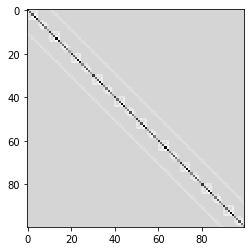

In [52]:
# točnost
tolerance = 1e-8

# učitavanje matrice iz .txt datoteke
stieltjes = np.genfromtxt('stieltjes.txt').reshape(100,100)

# vidimo da je matrica rijetko popunjena
plt.imshow(stieltjes, interpolation='nearest',cmap='gray_r')
plt.show()

In [53]:
# korisni vektori
one = np.ones(len(stieltjes))
rhs = stieltjes @ one
unknown = np.zeros(len(stieltjes))
xAxis = np.arange(1,101)

Najprije pronađimo optimalan $\omega\in(0,2)$ za SOR metodu. Za naše potrebe, dovoljno će biti uzeti realan broj $\omega$ s najviše dvije decimale.

In [54]:
omegas = np.linspace(0.01,1.99,199)
stepNumber = np.zeros(len(omegas))
x = np.zeros((len(omegas),len(rhs)))
for i in range(len(omegas)):
    print('Računam SOR metodom za omega = ', omegas[i])
    x[i], residual, approximation = sor(unknown, stieltjes, rhs, omegas[i], tolerance)
    stepNumber[i] = len(residual)
    print('Broj koraka potreban za dostizanje tražene točnosti: ', stepNumber[i])

Računam SOR metodom za omega =  0.01
Broj koraka potreban za dostizanje tražene točnosti:  11477.0
Računam SOR metodom za omega =  0.02
Broj koraka potreban za dostizanje tražene točnosti:  5711.0
Računam SOR metodom za omega =  0.03
Broj koraka potreban za dostizanje tražene točnosti:  3788.0
Računam SOR metodom za omega =  0.04
Broj koraka potreban za dostizanje tražene točnosti:  2827.0
Računam SOR metodom za omega =  0.05
Broj koraka potreban za dostizanje tražene točnosti:  2250.0
Računam SOR metodom za omega =  0.060000000000000005
Broj koraka potreban za dostizanje tražene točnosti:  1866.0
Računam SOR metodom za omega =  0.06999999999999999
Broj koraka potreban za dostizanje tražene točnosti:  1591.0
Računam SOR metodom za omega =  0.08
Broj koraka potreban za dostizanje tražene točnosti:  1385.0
Računam SOR metodom za omega =  0.09
Broj koraka potreban za dostizanje tražene točnosti:  1225.0
Računam SOR metodom za omega =  0.09999999999999999
Broj koraka potreban za dostizanje

Broj koraka potreban za dostizanje tražene točnosti:  25.0
Računam SOR metodom za omega =  1.32
Broj koraka potreban za dostizanje tražene točnosti:  26.0
Računam SOR metodom za omega =  1.33
Broj koraka potreban za dostizanje tražene točnosti:  27.0
Računam SOR metodom za omega =  1.34
Broj koraka potreban za dostizanje tražene točnosti:  27.0
Računam SOR metodom za omega =  1.35
Broj koraka potreban za dostizanje tražene točnosti:  28.0
Računam SOR metodom za omega =  1.36
Broj koraka potreban za dostizanje tražene točnosti:  28.0
Računam SOR metodom za omega =  1.37
Broj koraka potreban za dostizanje tražene točnosti:  29.0
Računam SOR metodom za omega =  1.3800000000000001
Broj koraka potreban za dostizanje tražene točnosti:  30.0
Računam SOR metodom za omega =  1.3900000000000001
Broj koraka potreban za dostizanje tražene točnosti:  30.0
Računam SOR metodom za omega =  1.4000000000000001
Broj koraka potreban za dostizanje tražene točnosti:  31.0
Računam SOR metodom za omega =  1.4

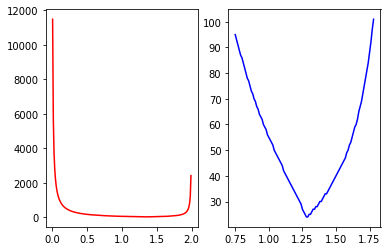

In [55]:
fig1, (ax1, ax2) = plt.subplots(1,2)

# ovaj plot prikazuje broj iteracija za svaki omega
ax1.plot(omegas, stepNumber, label='Broj iteracija',color='red')

# ovaj plot prikazuje broj iteracija za one omege za koje se tražena točnost postiže
# u manje od 100 koraka
ax2.plot(omegas[74:178], stepNumber[74:178], label='Za omega <= 100', color='blue')

Možemo vidjeti da za $\omega=1.28$ i $\omega=1.29$ dobivamo traženo aproksimativno rješenje u najmanje koraka, točnije $24$. Jednostavnosti radi, neka je $\omega=1.28$.

In [56]:
print('Optimalan omega: ', omegas[np.argmin(stepNumber)])
print('Broj koraka za optimalan omega: ', stepNumber.min())

Optimalan omega:  1.28
Broj koraka za optimalan omega:  24.0


In [57]:
%%time
# rješavanje sustava koristeći Jacobijevu metodu
%time xJacobi, resJacobi, approxJacobi = jacobi(unknown, stieltjes, rhs, tolerance)

# rješavanje sustava koristeći Gauss-Seidelovu metodu
%time xGS, resGS, approxGS = gaussSeidel(unknown, stieltjes, rhs, tolerance)

# rješavanje sustava koristeći SOR metodu
%time xSOR, resSOR, approxSOR = sor(unknown, stieltjes, rhs, omegas[np.argmin(stepNumber)], tolerance)

Wall time: 5.96 ms
Wall time: 1.99 ms
Wall time: 996 µs
Wall time: 11.9 ms


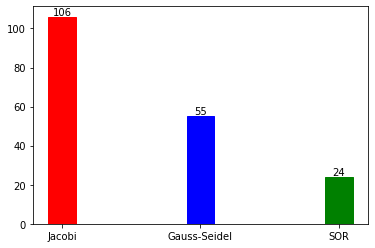

In [58]:
fig2, ax = plt.subplots()
labels = [len(resJacobi), len(resGS), len(resSOR)]
barlist = ax.bar(['Jacobi', 'Gauss-Seidel', 'SOR'], labels, width=0.2)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')

bars = ax.patches

for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, label,
            ha='center', va='bottom')
plt.show()

Također primijetimo da za $\omega=1$, i SOR metoda daje traženo aproksimativno rješenje u $55$ koraka. 

Pokretanjem koda u idućoj ćeliji, dobit ćemo slikovni prikaz iteracija. Budući da Jacobijeva metoda daje aproksimativno rješenje u 105 iteracija, Gauss-Seidelova u 55, a SOR za odabrani $\omega$ u $24$, preporučam preskočiti pokretanje donjeg (zakomentiranog) koda, radije pogledajmo $3$ videa koji se nalaze ispod sljedeće ćelije.

In [ ]:
# kreiranje plotova Jacobijeve metode
# plt.plot(np.arange(1,101), one, label='egzaktno rješenje')
# plt.title("Jacobijeva metoda")
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05),
#            fancybox=True, shadow=True, ncol=5)
# for i in range(0,len(approxJacobi)):
#     plt.plot(xAxis,approxJacobi[i].T)
#     plt.savefig("Jacobi" + str(i) + ".png")

# kreiranje plotova Gauss-Seidelove metode
# plt.plot(xAxis, one, label='egzaktno rješenje')
# plt.title("Gauss-Seidelova metoda")
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
# for i in range(0,len(approxGS)):
#     plt.plot(xAxis,approxGS[i].T)
#     plt.savefig("GS" + str(i) + ".png")

# kreiranje plotova SOR metode s odabranim omega = 1.28
# plt.plot(xAxis, one, label='egzaktno rješenje')
# plt.title("SOR metoda")
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05),
#            fancybox=True, shadow=True, ncol=5)
# for i in range(0,len(approxSOR)):
#     plt.plot(xAxis,approxSOR[i].T)
#     plt.savefig("SOR" + str(i) + ".png")

In [59]:
from IPython.display import Video
Video("JacobiStieltjes.mp4")

In [60]:
Video("GaussSeidelStieltjes.mp4")

In [61]:
Video("SORStieltjes.mp4")

Pogledajmo za kraj koliko je aproksimativno rješenje svake metode blizu egzaktnom rješenju:

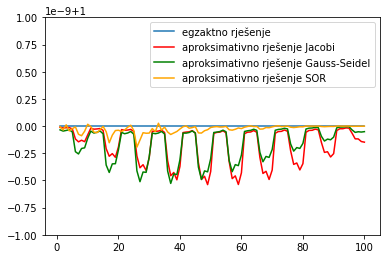

In [62]:
plt.ylim([1-1e-9, 1+1e-9])
plt.plot(xAxis, one, label='egzaktno rješenje')
plt.plot(xAxis, approxJacobi[-1].T, label='aproksimativno rješenje Jacobi', color='red')
plt.plot(xAxis, approxGS[-1].T, label='aproksimativno rješenje Gauss-Seidel', color='green')
plt.plot(xAxis, approxSOR[-1].T, label='aproksimativno rješenje SOR', color='orange')
plt.legend()

#### 1.4.2. Slučajno generirana matrica  <a name="Slucajna"></a>

Generirajmo sada $10\times10$ matricu slučajnih varijabli te ponovimo postupak kao i sa Stieltjes matricom:

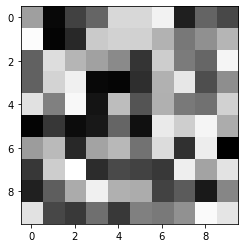

In [38]:
import numpy.matlib

# seed of Life, the Universe and Everything 
np.random.seed(42)
A = np.matlib.rand(10,10)
plt.imshow(A, interpolation='nearest',cmap='gray_r')
plt.show()

In [44]:
# korisni vektori
one = np.ones(len(A))
rhs = A @ one
unknown = np.zeros(len(A))
xAxis = np.arange(1,len(A))
omegas = np.linspace(0.01,1.99,199)
stepNumber = np.zeros(len(omegas))
x = np.zeros((len(omegas),len(rhs.T)))
for i in range(len(omegas)):
    print('Računam SOR metodom za omega = ', omegas[i])
    x[i], residual, approximation = sor(unknown, A, rhs.T, omegas[i], tolerance)
    stepNumber[i] = len(residual)
    print('Broj koraka potreban za dostizanje tražene točnosti: ', stepNumber[i])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Računam SOR metodom za omega =  0.01


ValueError: cannot reshape array of size 110 into shape (2,10)

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1,2)

# ovaj plot prikazuje broj iteracija za svaki omega
ax1.plot(omegas, stepNumber, label='Broj iteracija',color='red')

# ovaj plot prikazuje broj iteracija za one omege za koje se tražena točnost postiže
# u manje od 100 koraka
# ax2.plot(omegas[74:178], stepNumber[74:178], label='Za omega <= 100', color='blue')

In [ ]:
print('Optimalan omega: ', omegas[np.argmin(stepNumber)])
print('Broj koraka za optimalan omega: ', stepNumber.min())
# rješavanje sustava koristeći Jacobijevu metodu
%time xJacobi, resJacobi, approxJacobi = jacobi(unknown, A, rhs, tolerance)

# rješavanje sustava koristeći Gauss-Seidelovu metodu
%time xGS, resGS, approxGS = gaussSeidel(unknown, A, rhs, tolerance)

# rješavanje sustava koristeći SOR metodu
%time xSOR, resSOR, approxSOR = sor(unknown, A, rhs, omegas[np.argmin(stepNumber)], tolerance)

fig2, ax = plt.subplots()
labels = [len(resJacobi), len(resGS), len(resSOR)]
barlist = ax.bar(['Jacobi', 'Gauss-Seidel', 'SOR'], labels, width=0.2)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')

bars = ax.patches

for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, label,
            ha='center', va='bottom')
plt.show()

#### 1.4.3. Slučajno generirana dijagonalna matrica  <a name="Dijagonalna"></a>

In [ ]:
np.random.seed(42)
A = np.random.rand(20)
A = np.diag(A) * 10
plt.imshow(A, interpolation='nearest',cmap='gray_r')
plt.show()

### 1.5. Zaključak <a name="Zakljucak1"></a>

# 2. Numeričko rješavanje

## 2.1. Uvod<a name="uvod2"></a>

U mnogim primjenama u prirodnim i inžinjerskim znanostima vremenska promjena stanja promatranog sustava opisuje se diferencijalnim jednadžbama koje matematički opisuju zakone:
$$
\begin{equation}
    y'(t) = f(t,y(t)),\; t\geq t_{0}\\
    y(t_{0}) = y_{0} \label{eq:12}\tag{12}
\end{equation}
$$

Pri tome je $f:I\times\mathbb{R}^{d}\mapsto\mathbb{R}^{d}$, gdje je $I\subseteq\mathbb{R}$ otvoren interval, $t_{0}\in I$, $d\geq 1$ i $y_{0}\in\mathbb{R}^{d}$. Po komponentama, problem $\eqref{eq:12}$ glasi

$$
\begin{pmatrix}
    y'_{1}(t)\\
    y'_{2}(t)\\
    \vdots\\
    y'_{d}(t)
\end{pmatrix}= 
\begin{pmatrix}
    f_{1}(t,y_{1}(t),y_{2}(t),...,y_{d}(t))\\
    f_{2}(t,y_{1}(t),y_{2}(t),...,y_{d}(t))\\
    \vdots\\
    f_{d}(t,y_{1}(t),y_{2}(t),...,y_{d}(t))
\end{pmatrix}, 
\begin{pmatrix}
    y'_{1}(t_{0})\\
    y'_{2}(t_{0})\\
    \vdots\\
    y'_{d}(t_{0})
\end{pmatrix}=
\begin{pmatrix}
    (y_{0})_{1}\\
    (y_{0})_{2}\\
    \vdots\\
    (y_{0})_{n}
\end{pmatrix}
$$

Kažemo da je $\eqref{eq:12}$ inicijalni problem za sustav običnih diferencijalnih jednadžbi. Ako je

$$
f(t,x_{1},x_{2},...,x_{d}) = A(t)
\begin{pmatrix}
    x_{1}\\
    x_{2}\\
    \vdots\\
    x_{n}
\end{pmatrix}+
\begin{pmatrix}
    b_{1}(t)\\
    b_{2}(t)\\
    \vdots\\
    b_{n}(t)
\end{pmatrix}$$

onda kažemo da je sustav ODJ linearan.

Kao što sam naslov kaže, naš je cilj riješiti problem $\eqref{eq:12}$ numerički. To znači izračunati aproksimacije vrijednosti u konačno točaka $t_{1},t_{2},...,t_{n}$ u zadanom intervalu $[t_{0},T]$.

Metode rješavanja inicijalnog problema za obične diferencijalne jednadžbe numeričkim aproksimacijama dijelimo na implicitne i eksplicitne te na jednokoračne i višekoračne metode. Eksplicitne metode računaju stanje u idućem vremenskom sloju koristeći trenutni vremenski sloj, dok implicitne metode rješavaju sustav koristeći idući i trenutni vremenski sloj.

Matematički zapisano, ako $Y(t)$ predstavlja stanje u trenutnom vremenskom sloju a $Y(t+\Delta t)$ predstavlja stanje u idućem vremenskom sloju (gdje $\Delta t$ predstavlja mali korak u vremenu, $\Delta t> 0$), tada za eksplicitnu metodu rješavamo sustav oblika

$$ Y(t+\Delta t) = F(Y(t)) $$

dok za implicitnu metodu rješavamo sustav oblika

$$ G(Y(t),Y(t+\Delta t))=0$$

kako bismo dobili $Y(t+\Delta t)$.

Metode koje ćemo navesti i objasniti su Eulerova metoda, trapezna metoda i Adams–Bashforthova metoda.

## 2.2. Jednokoračne metode <a name="jednokoracne"></a>

### 2.2.1. Eulerova metoda<a name="Euler"></a>

Eulerova metoda najjednostavniji je primjer jednokoračne eksplicitne metode – vrijednost $y_{i+1}$ dobivena je eksplicitnim izrazom koji koristi informaciju samo iz jednog prethodnog koraka $t_{i}$.

Ključni element numeričkog rješavanja inicijalnog problema
$$
\begin{equation}
    y'(t) = f(t,y(t)),\; t\geq t_{0}\\
    y(t_{0}) = y_{0}
\end{equation}
$$ 

je kako iskoristiti diferencijalnu jednadžbu i od poznate vrijednosti $y(t_{0})$ dobiti što bolju aproksimaciju za $y(t_{1})$, i tako sve do $y(t_{n})$.

$$ y(t_{i+1})-y(t_{i}) = \int_{t_{i}}^{t_{i+1}}y'(\tau)d\tau = \int_{t_{i}}^{t_{i+1}} f(\tau,y(\tau))d\tau. $$

Uočimo da relaciju

$$ y(t_{i+1}) = y(t_{i}) + \int_{t_{i}}^{t_{i+1}} f(\tau,y(\tau))d\tau $$

možemo iskoristiti za aproksimaciju $y(t_{i+1})$ tako što ćemo aproksimirati numeričku vrijednost integrala. Istina, vrijednost podintegralne funkcije znamo samo u lijevom rubu intervala $[t_{i},t_{i+1}]$ pa je najjednostavnije što možemo učiniti sljedeće

$$ \int_{t_{i}}^{t_{i+1}} f(\tau,y(\tau))d\tau \approx (t_{i+1}-t_{i})f(t_{i},y(t_{i})) $$

pa imamo

$$ y(t_{i+1}) \approx y(t_{i}) + (t_{i+1}-t_{i})f(t_{i},y(t_{i})). $$

Promotrimo ideju na idućem primjeru. Integral funkcije između točke $t_{i}=1$ i $t_{i+1}=1.3$ aproksimiramo površinom pravokutnika $(1.3-1)\cdot f(1,y(1))$. Za dovoljno mali korak $\Delta t$, površina $X$ je zanemarivo mala, razlika površinâ je dovoljno mala, dakle aproksimacija je dovoljno dobra.

Text(1.22, 1.2, 'X')

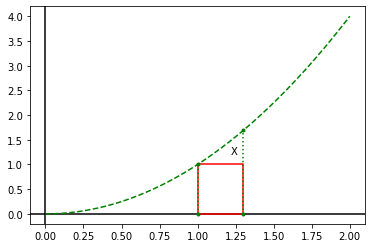

In [92]:
x = np.linspace(0, 2, 200)
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(x, x**2, color='green', linestyle='--')
ax.plot([1., 1., 1.3, 1.3, 1.], [0., 1., 1., 0., 0.], color='red', label='Aproksimativna površina')
ax.plot([1.3, 1.3],[0., 1.69], color='green', linestyle=':', marker = '.')
ax.plot([1., 1.],[0., 1.], color='green', linestyle=':', marker = '.')
ax.text(1.22,1.2, 'X')

Neka je $n$ broj točaka u kojima ćemo aproksimirati rješenje. Diskretne vrijednosti $t_{0},t_{1},...,t_{n}$ možemo birati sa varijabilnim koracima $h_{i}=t_{i+1}-t_{i}$, za sve $i=0,1,...,n$.

In [97]:
def euler(f, y, t, T, n):
    d = len(y)
    x = np.linspace(t, T, n+1)
    h = (T-t) / n
    solution = np.zeros((d, n+1))
    solution[:, 0] = y
    for i in range(1, n-1):
        solution[:, i+1] = solution[:, i] + h*f(t[i], solution[:, i])
    return solution, x

### 2.2.2. Trapezna metoda<a name="trapez"></a>

## 2.3. Višekoračne metode<a name="visekoracne"></a>

### 2.3.1. Adams–Bashforthova metoda<a name="Adams"></a>

## 2.4. Testiranje i usporedba na primjerima<a name="Testiranje2"></a>

## 2.5. Zaključak<a name="Zakljucak2"></a>

# 3. Literatura<a name="Literatura"></a>

<b> Prvi dio </b>

Iterativne metode: https://en.wikipedia.org/wiki/Iterative_method

Jacobijeva metoda: https://en.wikipedia.org/wiki/Jacobi_method

Gauss–Seidelova metoda: https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method

SOR metoda: https://en.wikipedia.org/wiki/Successive_over-relaxation

Stieltjes matrica: https://en.wikipedia.org/wiki/Stieltjes_matrix i https://web.math.pmf.unizg.hr/~nela/zr1.html

Dodavanje oznaka na barove u bar chartu: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart/48372659

Bojanje barova u bar chartu: https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python

Matplotlib dokumentacija: https://matplotlib.org/

Numpy dokumentacija: https://docs.scipy.org/doc/numpy/index.html

Kreiranje videa: https://gifmaker.me/

Matrični zapis iterativnih metodâ: https://web.math.pmf.unizg.hr/~nela/zr1vjezbe/zr1_iterativne_metode.pdf

Teoretska pozadina numeričkog rješavanja sustava linearnih jednadžbi: https://web.math.pmf.unizg.hr/~drmac/na001.pdf

<b> Drugi dio </b>

Teoretska pozadina numeričkog rješavanja inicijalnog problema za ODJ: https://web.math.pmf.unizg.hr/~drmac/b0.pdf i https://web.math.pmf.unizg.hr/~nela/zr2.html

Eksplicitne i implicitne metode: https://en.wikipedia.org/wiki/Explicit_and_implicit_methods

Eulerova metoda: https://en.wikipedia.org/wiki/Euler_method

Trapezna metoda: https://en.wikipedia.org/wiki/Trapezoidal_rule

Adams–Bashforthova metoda: https://en.wikipedia.org/wiki/Linear_multistep_method#Adams%E2%80%93Bashforth_methods

Prikazivanje osi u plotu: https://stackoverflow.com/questions/25689238/show-origin-axis-x-y-in-matplotlib-plot

Osnovni elementi koje morate imati (bez kojih se zadaća ne smatra predanom, i nemate uvjet za prolaz) su barem 5 od sljedećih 6:

- barem 3 funkcije ili klase koje ste sami napisali

<b>IMAM</b>

- barem 99 linija koda (ne računaju se prazne linije, linije koje sadrže isključivo komentare, te duplicirane linije s trivijalnim izmjenama)

<b>po mojem brojanju, zasad 67 takvih linija</b>

- barem 5 slika (grafova ili drugačijih vizualizacija) kreiranih u bilježnici (ubacivanje gotovih slika/videa je dopušteno, ali se ne računa za ovaj kriterij)

<b>ako brojim kreiranje plotova za video, onda sigurno da</b>
- barem 3 objekta, metode ili funkcije iz paketa Numpy, Scipy, Pandas ili Matplotlib, koje su obrađene na "predavanjima", i barem 3 koje nisu

<b>SA PREDAVANJA: numpy -> genfromtxt, array, diag,...</b>

<b>NISU SA PREDAVANJA: ax.patches, np.argmin, np.tril, np.triu, get_height, get_width</b>

- barem 3 objekta, metode ili funkcije iz nekog Anacondinog paketa koji nije obrađen na "predavanjima" (ne mora biti dio standardne instalacije, ali u tom slučaju napišite koje ste dodatne pakete koristili i kako se instaliraju)

<b> imali smo from IPython.display import YouTubeVideo, ali ne i Video</b>

<b> from PIL import Image </b>

- barem 3 objekta, metode ili funkcije iz standardne Pythonove biblioteke koje nisu obrađene na predavanjima